# Evaluate

This notebook takes care of running evaluation metrics on a single model. This file is used to calculate the super-resolutions of specific LR images, as well as calculate the average PSNR/SSIM scores and learning rates for a single trained network. In addition, these metrics are also plotted in learning curves. As well, this file is used to plot and compare network predictions to the high-resolution label as well as to upscaled versions of the LR image using linear interpolation. This file was used to evaluate each individual network to check which hyperparameters were optimal, as well as to produce upscaled images which could be opened and compared to the ground truth label.

This notebook was used during the training and validation phase to check model performance for each hyperparameter and tune the hyperparameters. This notebook was also used to check model performance on the test data to determine which model performed and generalized the best. 

In [1]:
# Import modules
import evaluate
import numpy as np
from RFDN import RFDN, RFDN1
from FDCN import FDCN
from BaseN import BaseN

## Evaluation

Here are the main cells that are used for evaluation purposes. In the cell below, we define some preliminary variables.

The `data_dir` variable simply holds the absolute path to the data-containing directory

In [2]:
data_dir = "/home/samuel/Documents/CMPUT511/Project/Data"

### Model Choice

Here, we determine which model to evaluate. Simply adjust the comments in the cell below to choose which model to evaluate, then the following cells will run the evaluation metrics and print out the results.

In [3]:
model = RFDN(nf=10, upscale=2); checkpoint_file = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/AvgLearningCurve/RFDN/checkpoint_40_LR.tar"
# model = FDCN(nf=10, upscale=2); checkpoint_file = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/AvgLearningCurve/FDCN/checkpoint.tar"
# model = BaseN(nf=10, upscale=2); checkpoint_file = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/AvgLearningCurve/BaseN/checkpoint.tar"
# model = RFDN1(nf=10, upscale=2); checkpoint_file = "/home/samuel/Documents/CMPUT511/Project/Checkpoints/AvgLearningCurve/RFDN1/checkpoint_0_40.tar"

In the cells below, we:
* View the upscaled prediction and HR label
* View the upscaled prediction and linearly interpolated upscaled verion
* Plot the learning curves for PSNR, SSIM, and loss for a network
* Generate and save a super-resoluted image, viewing its evaluation metrics as well, using the .predict() method
* Print the mean PSNR, SSIM, Loss, and Inference time
* Print the number of network parameters

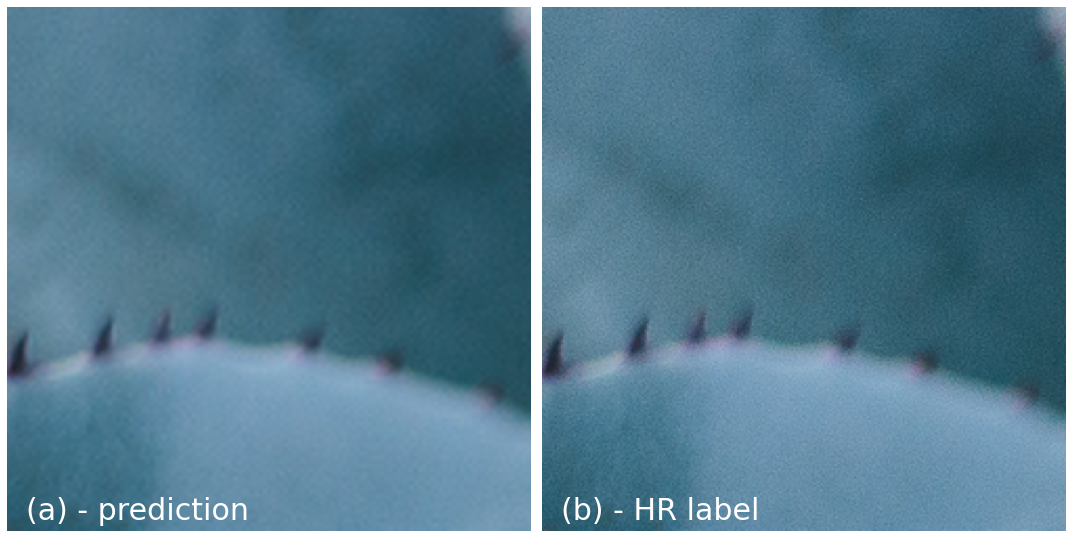

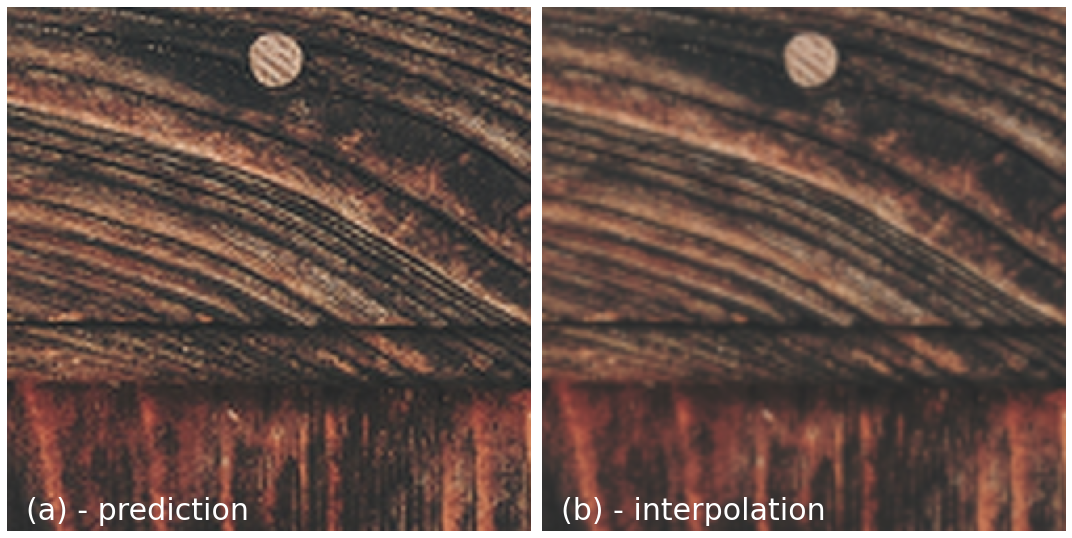

In [4]:
e = evaluate.Evaluate(model, checkpoint_file, data_dir)
e.compare_patches(56, size=250, start=(110,200))
e.compare_interpolation(84, size=250, start=(700,770))

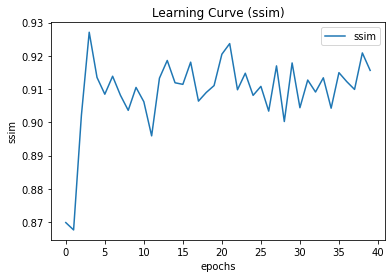

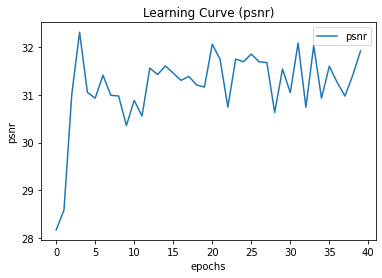

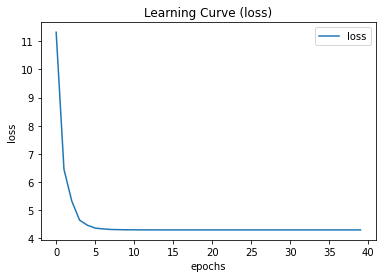

In [5]:
e.plot_lc("ssim")
e.plot_lc("psnr")
e.plot_lc("loss")

Save a predicted image, and print out its evaluation metrics

In [6]:
e.predict(99, img_name="/home/samuel/Documents/CMPUT511/Project/Checkpoints/upscaled_image.jpg")

PSNR: 30.131097251749534
SSIM: 0.9170269966125488
Average Loss: 4.571349531054497
Saving image


Get the mean evaluation metrics and plot

In [7]:
values = e.get_values()
psnr = np.mean(values["psnr"])
ssim = np.mean(values["ssim"])
time = np.mean(values["times"])
params = sum(param.numel() for param in model.parameters())

100%|██████████| 100/100 [02:09<00:00,  1.30s/it]


In [8]:
print(f"Average PSNR:              {psnr}")
print(f"Average SSIM:              {ssim}")
print(f"Average Inference Time:    {time}")
print(f"Number of parameters:      {params}")

Average PSNR:              31.32733055873964
Average SSIM:              0.9123885631561279
Average Inference Time:    0.1534073209762573
Number of parameters:      17772
